In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline
np.random.seed(10000)

Nessa seção vamos mostras alguns Métodos (métodos no sentido pythonico) da Classe Random para gerar números aleatorio.

In [2]:
n = 10; p = .3
binomial = np.random.binomial(10, 0.3, 10000) # binomial(n, p, size)
print(f'Media: {binomial.mean()} Variancia: {binomial.var()}')

Media: 2.9912 Variancia: 2.08452256


In [3]:
df = 10
chi = np.random.chisquare(df, 10000) # chi(df, size)
print(f'Media: {chi.mean()} Variancia: {chi.var()}')

Media: 10.022039475299275 Variancia: 20.15108870594009


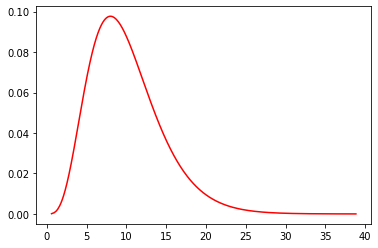

In [4]:
x = chi
y = stats.chi2.pdf(x, df)
sns.lineplot(x = x, y = y, color = 'red')

In [5]:
expo = np.random.exponential(scale = 2, size = 10000) # exponencial(1/lambda, size)
print(f'Media: {expo.mean()} Variancia: {expo.var()}')

Media: 1.9976208244424052 Variancia: 3.9478609697474


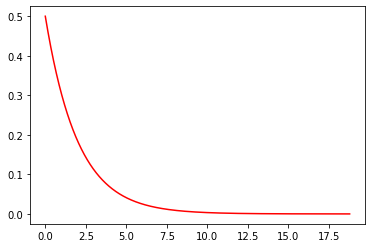

In [6]:
x = expo
y = stats.expon.pdf(x, scale = 2); y
sns.lineplot(x = x, y = y, color = 'red') # Esta estranho

In [7]:
gama = np.random.gamma(2, 2, 10000) # gama(alfa, 1/beta, sizer), alfa = 1, beta = 1/2
print(f'Media: {gama.mean()} Variancia: {gama.var()}')

Media: 4.007046840808108 Variancia: 7.877323612385508


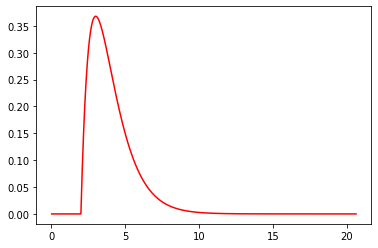

In [8]:
x = gama
y = stats.gamma.pdf(x, 2, 2)
sns.lineplot(x = x, y = y, color = 'red')

In [9]:
beta = np.random.beta(2, 2, 10000) # beta(alfa, 1/beta, size)
print(f'Media: {beta.mean()} Variancia: {beta.var()}')

Media: 0.49851888475719996 Variancia: 0.05049359185663977


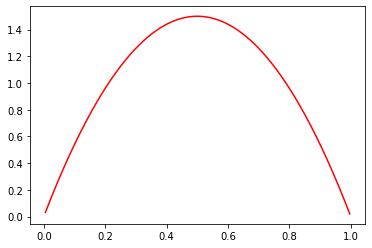

In [10]:
x = beta
y = stats.beta.pdf(x, 2, 2)
sns.lineplot(x = x, y = y, color = 'red')

In [11]:
t = np.random.standard_t(10, 10000) # t(df, size)
print(f'Media: {t.mean()} Variancia: {t.var()}')

Media: -0.005123966045172261 Variancia: 1.2488670720590624


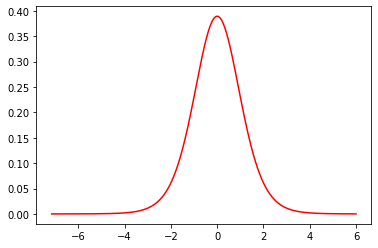

In [12]:
x = t
y = stats.t.pdf(x, 10)
sns.lineplot(x = x, y = y, color = 'red')

In [13]:
normal = np.random.normal(2, 1, 10000)
print(f'Media: {normal.mean()} Variancia: {normal.var()}')

Media: 1.9939557174492732 Variancia: 1.0002113380481508


Text(-2, 0.35, '$\\mu = 2$ e $\\sigma = 1$')

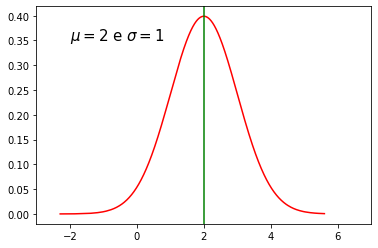

In [14]:
x = normal
y = stats.norm.pdf(x, 2, 1)
g = sns.lineplot(x = x, y = y, color = 'red')
g.set_xlim(-3, 7)
g.axvline(x = 2, color = 'green')
g.text(-2,.35 , r'$\mu = 2$ e $\sigma = 1$', fontsize = 15)

In [15]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)
X, Y = np.meshgrid(x,y)

In [16]:
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
# Retorna um vetor (x,y) com todas as combinações possiveis

pxy = stats.multivariate_normal.pdf(pos, [0, 1], [[1, 0], [0, 2]])
px = stats.norm.pdf(x, 0, 1)
py = stats.norm.pdf(y, 0, 1)

Text(0.5, 0, 'Eixo Z')

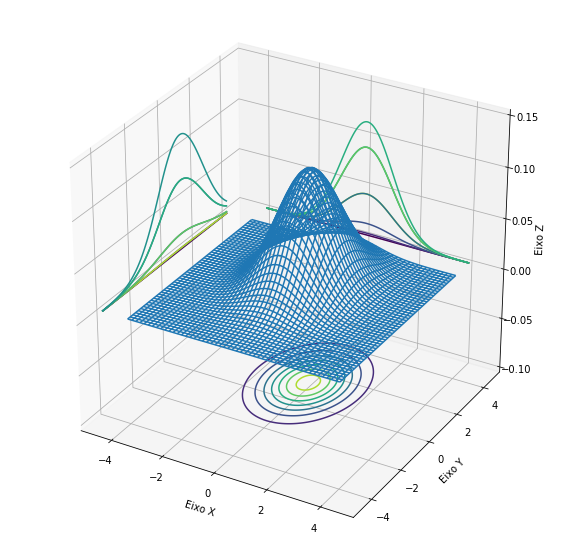

In [17]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
ax.plot_wireframe(X, Y, pxy)
ax.contour(X, Y, pxy, zdir='x', offset = -5)
ax.contour(X, Y, pxy, zdir='y', offset = 5)
ax.contour(X, Y, pxy, zdir='z', offset = -.1)
ax.set_zlim(-.1, .15)
ax.set_ylim(-5, 5)
ax.set_xlim(-5, 5)
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')

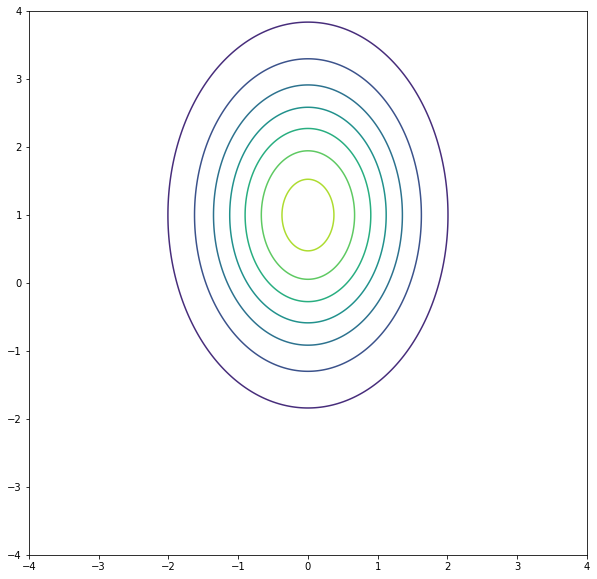

In [18]:
fig = plt.figure(figsize = (10, 10))
fig = fig.add_subplot(1, 1, 1)
fig.contour(X, Y, pxy)

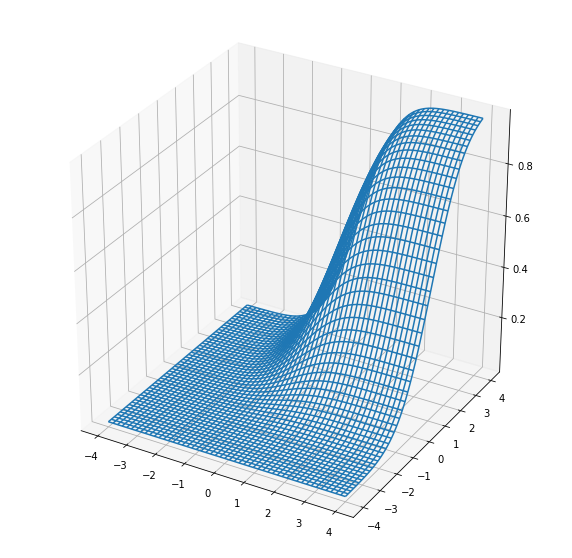

In [19]:
pxy = stats.multivariate_normal.cdf(pos, [0, 1], [[1, 0], [0, 2]])
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
ax.plot_wireframe(X, Y, pxy)